In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.stats import multivariate_normal

In [10]:
def create_data(n):
    '''
    returns data of n random points around centers (1,1) and (-1,-1) each
    points aroung (1,1): label 1
    points aroung (-1,-1): label 0
    '''
    
    c1 = np.random.normal(1, 0.5, (50, 2))
    c1 = np.hstack((c1, np.ones((50,1))))

    c2 = np.random.normal(-1, 0.5, (50, 2))
    c2 = np.hstack((c2, np.zeros((50,1))))

    data = np.vstack((c1, c2))
    return data

def sig_act(s):
    '''activation function'''
    return 1.0/(1.0+np.exp(-s))

def Loss(data, k, d):
    '''returns Loss for provided separation line'''
    
    #calculate class prediction with specified line c_hat = sig(y - kx -d)
    c_hat = sig_act((data[:,1] - (k*data[:,0] + d))/np.sqrt((k**2)+1))

    return np.sum((data[:,2] - c_hat)**2)

def marginal_posterior_k_Loss(k_grid):
    '''
    calls create_data and returns Loss for each value in k_grid
    '''
    data = create_data(50)
    L = []
    for k in k_grid:
        L.append(Loss(data, k, 0))
        
    return L

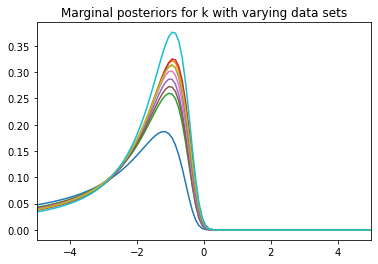

In [13]:
#import scipy.integrate as integrate #integration of normalizing constant
#e.g. #Z1 = integrate.quad(lambda q: np.exp(-beta * my_pot(q)), -10,10)
# For now I use simple riemann sum

k_grid = np.linspace(-30, 30, 600)

fig = plt.figure()
for i in range(10):
    L = marginal_posterior_k_Loss(k_grid)
    
    posterior =  np.exp(-np.array(L))
    norm_const = np.sum((30-(-30))/600 * posterior) #riemann integral of normalising constant
    
    plt.plot(k_grid, posterior/norm_const)

plt.title("Marginal posteriors for k with varying data sets")
plt.xlim(-5,5)
plt.show()